In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
startup = pd.read_csv('/content/50_Startups (1).csv')

In [4]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

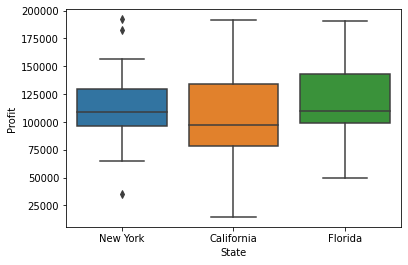

In [7]:
sns.boxplot(x='State',y='Profit',data=startup)

In [8]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


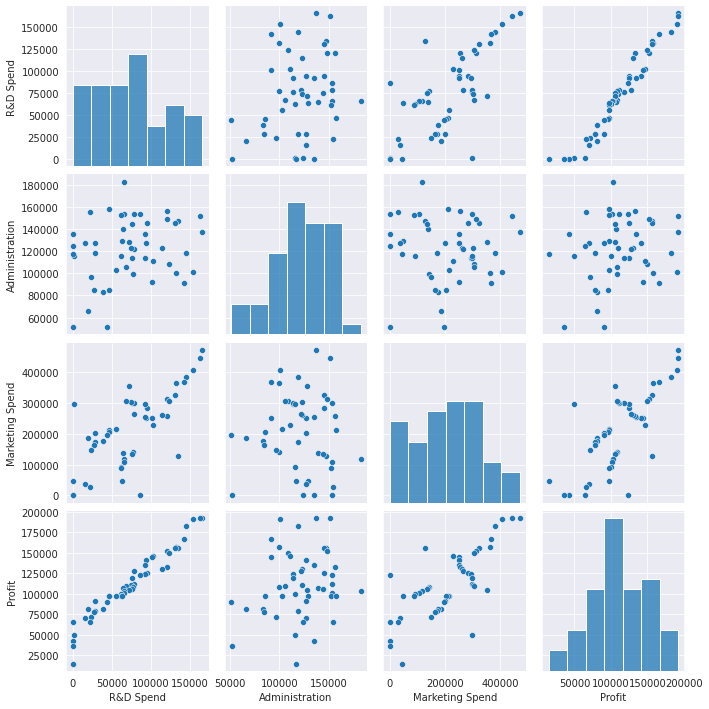

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


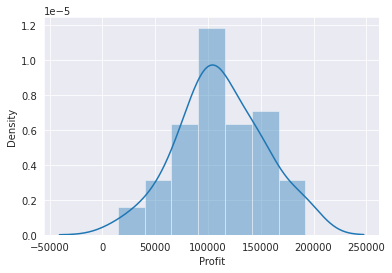

In [10]:
sns.distplot(startup['Profit'],)

In [99]:
data = startup.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS'}, axis = 1)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADM     50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Model

In [14]:
model = smf.ols('Profit~RDS+ADM+MS+State',data = data).fit()

In [15]:
model

In [16]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RDS                      0.806023
ADM                     -0.027004
MS                       0.026980
dtype: float64

In [39]:
# t and p value
model.tvalues , np.round(model.pvalues,5)

(Intercept             7.280560
 State[T.Florida]      0.058970
 State[T.New York]    -0.012864
 RDS                  17.368580
 ADM                  -0.517012
 MS                    1.573889
 dtype: float64, Intercept            0.00000
 State[T.Florida]     0.95324
 State[T.New York]    0.98979
 RDS                  0.00000
 ADM                  0.60774
 MS                   0.12268
 dtype: float64)

In [53]:
print(model.tvalues,'\n' , model.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
RDS                  17.368580
ADM                  -0.517012
MS                    1.573889
dtype: float64 
 Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
RDS                  2.578772e-21
ADM                  6.077373e-01
MS                   1.226769e-01
dtype: float64 5


In [100]:
(model.rsquared, model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.34e-27
Time:                        13:28:16   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RDS                   0.8060      0.046     17.369      0.000       0.712       0.900
ADM                  -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS                    0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#Simple linear regression 
pr_r = smf.ols('Profit~ADM',data = data).fit()
pr_r.tvalues , pr_r.pvalues
#print(pr_r.tvalues,'\n' , pr_r.pvalues)

(Intercept    3.040044
 ADM          1.419493
 dtype: float64, Intercept    0.003824
 ADM          0.162217
 dtype: float64)

In [56]:
pr_a = smf.ols('Profit~RDS',data = data).fit()
pr_a.tvalues , pr_a.pvalues

(Intercept    19.320288
 RDS          29.151139
 dtype: float64, Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64)

In [45]:
pr_m = smf.ols('Profit~MS',data = data).fit()
pr_m.tvalues , pr_m.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64, Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [50]:
pr_rm = smf.ols('Profit~ADM+MS+RDS',data = data).fit()
pr_rm.tvalues , pr_rm.pvalues

(Intercept     7.626218
 ADM          -0.525507
 MS            1.655077
 RDS          17.846374
 dtype: float64, Intercept    1.057379e-09
 ADM          6.017551e-01
 MS           1.047168e-01
 RDS          2.634968e-22
 dtype: float64)

## VIF

In [61]:
rsq_a = smf.ols('ADM~MS+RDS', data = data).fit().rsquared
vif_a = 1/(1-rsq_a) 

rsq_m = smf.ols('MS~ADM+RDS', data = data).fit().rsquared
vif_m = 1/(1-rsq_m) 

rsq_r = smf.ols('RDS~ADM+MS', data = data).fit().rsquared
vif_r = 1/(1-rsq_r) 

dl = {'Variables':['ADM','MS','RDS'],'VIF':[vif_a,vif_m,vif_r]}
vif_frame = pd.DataFrame(dl)
vif_frame

,Variables,VIF
0,ADM,1.175091
1,MS,2.326773
2,RDS,2.468903


## Residual analysis

Text(0.5, 1.0, 'normal Q-Q plot of residuals')

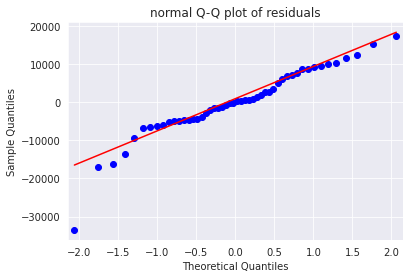

In [63]:
import statsmodels.api as sm
sm.qqplot(model.resid,line = 'q')
plt.title('normal Q-Q plot of residuals')

In [65]:
list(np.where(model.resid<-30000))

[array([49])]

In [69]:
def get_standardized_values(vals) : return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standard residual value')

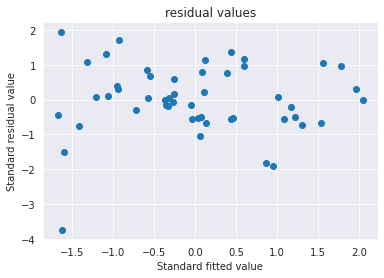

In [73]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('residual values')
plt.xlabel('Standard fitted value')
plt.ylabel('Standard residual value')

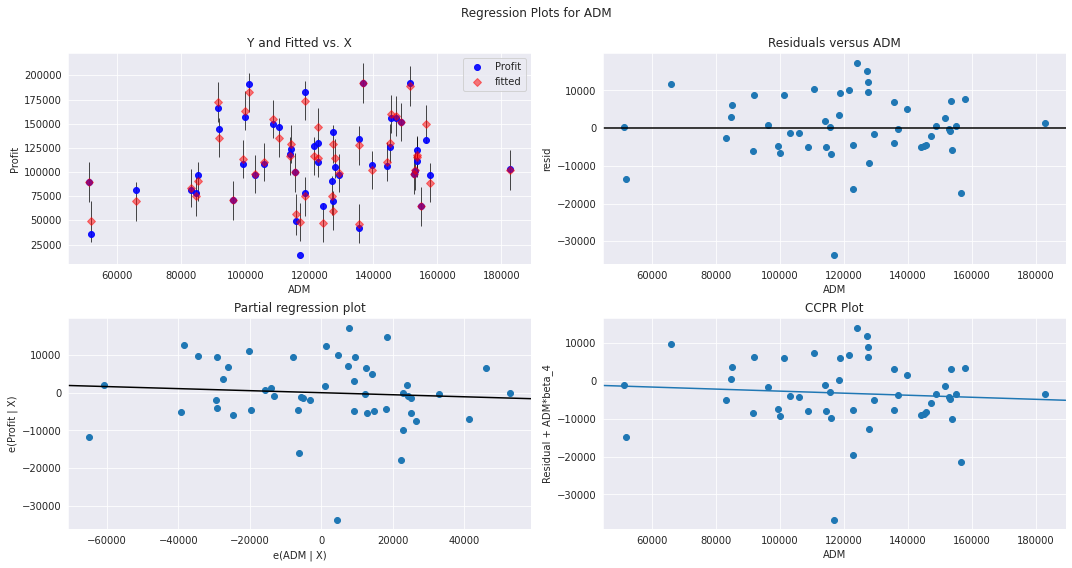

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'ADM',fig = fig)

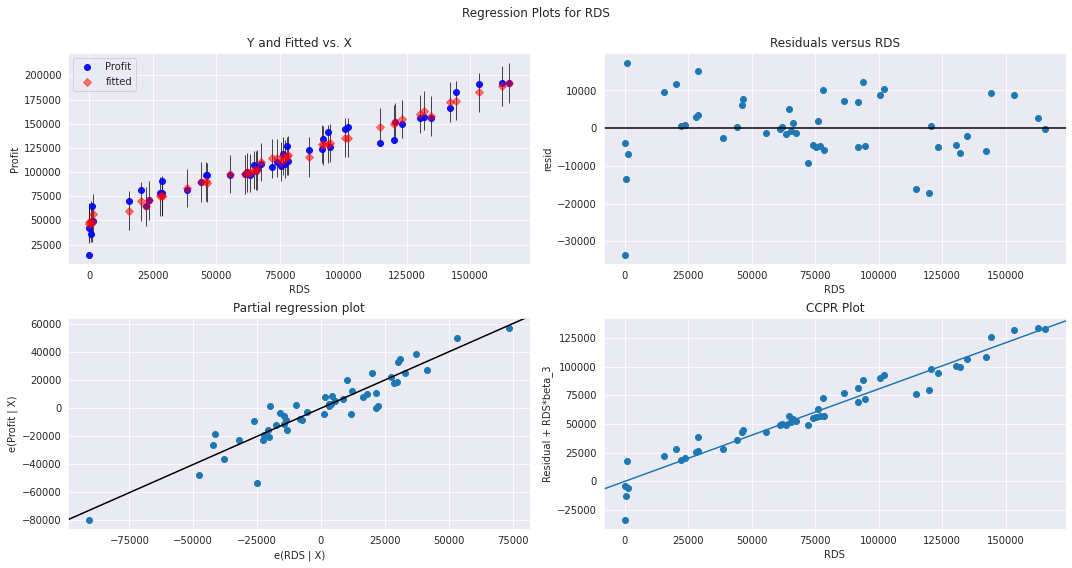

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'RDS',fig = fig)

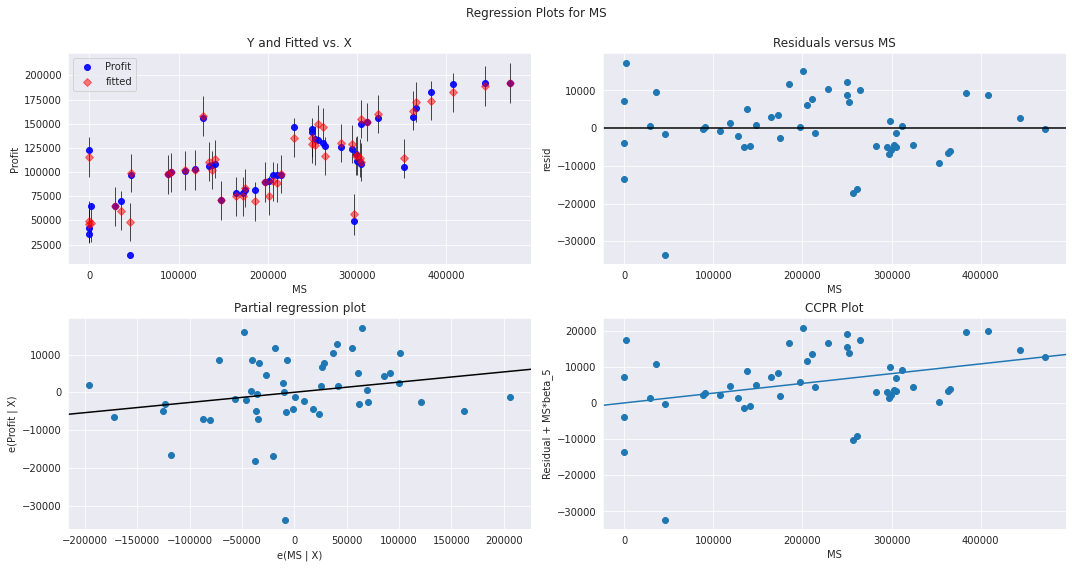

In [77]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'MS',fig = fig)

## Cooks distance

In [78]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


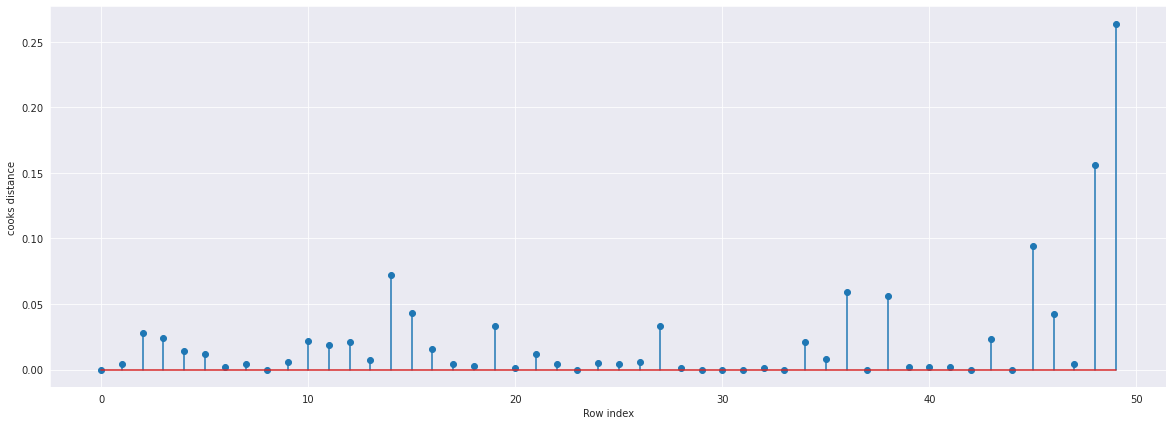

In [80]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [81]:
(np.argmax(c),np.max(c))

(49, 0.263959435867549)

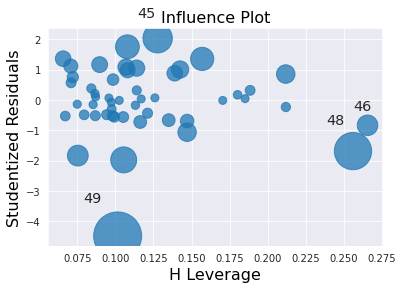

In [95]:
# high influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [96]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [97]:
leverage_cutoff

0.36

In [102]:
data[data.index.isin((49, 48))]

,RDS,ADM,MS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [103]:
data.head()

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [104]:
start = data.drop(data.index[[49,48]],axis = 0).reset_index()

In [ ]:
start

In [107]:
# model
final_model = smf.ols('Profit~RDS+ADM+MS', data = start).fit()
final_model

In [108]:
final_model.rsquared,final_model.aic

(0.9626766170294073, 994.6690439260116)

In [109]:
# cooks distance 
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


ValueError: ignored

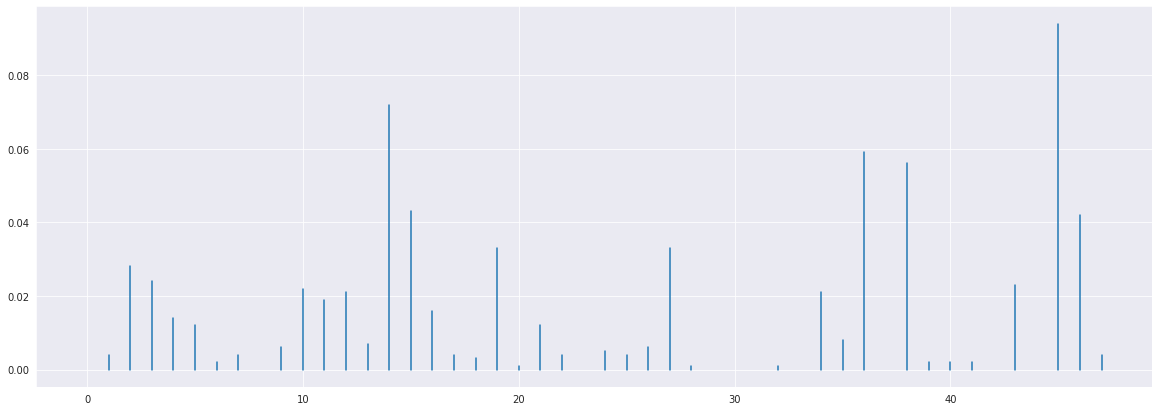

In [110]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

## model predictions

In [119]:
new_data = pd.DataFrame({'RDS':'71000','ADM':'85000','MS':'200000'}, index=[0])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RDS     1 non-null      object
 1   ADM     1 non-null      object
 2   MS      1 non-null      object
dtypes: object(3)
memory usage: 32.0+ bytes


In [123]:
new_data1 = new_data.astype('float')

In [124]:
new_data1

,RDS,ADM,MS
0,71000.0,85000.0,200000.0


In [125]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     1 non-null      float64
 1   ADM     1 non-null      float64
 2   MS      1 non-null      float64
dtypes: float64(3)
memory usage: 32.0 bytes


In [126]:
final_model.predict(new_data1)

0    113146.958403
dtype: float64

In [127]:
result =final_model.predict(start)
result

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64